<a href="https://colab.research.google.com/github/ProgrammerDavid1/Data-Analysis/blob/main/Data%20Analyze%203)%20DataFrame%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터분석프로그래밍 6주차 실습

## 실습 시작 전 유의사항

※ 반드시 상단 메뉴에서 '**파일 - 드라이브에 사본 저장**' 진행 후 시작하세요.

## 실습 개요
- 웹 스크래핑
  - requests
  - selenium
  - BeautifulSoup
- 데이터프레임
  - 외부 데이터 가져오기
  - 데이터 살펴보기
  - 데이터 시각화

---

## 웹 스크래핑

## requests를 통해 웹으로부터 데이터를 수집하기



## Selenium을 이용한 웹 스크래핑

selenium은 requests와는 다르게, 웹 브라우저를 실제로 실행함으로써 페이지의 소스를 얻습니다.

그렇기 때문에 웹 드라이버가 필요합니다.

얻은 HTML 소스는 BeautifulSoup를 통해 특정 태그만 추출할 수 있습니다.

---

## 데이터프레임

## 외부 데이터 가져오기

먼저 실습에 사용할 데이터셋을 다운로드할 것입니다.
- 파일은 아래 링크에서 다운받아서 본인의 구글 드라이브의 **`내 드라이브`**에 저장하세요.<br/>

> <table width="20%"><th align="center">데이터셋 링크</th><tr align="center"><td><a target="_blank" href="https://drive.usercontent.google.com/u/0/uc?id=14-dg0qkjbZtgwaIUHwE91Mn8-RAsEWhf&export=download"><img src="https://ssl.gstatic.com/images/branding/product/2x/drive_2020q4_48dp.png" width="30px">경기도인구데이터.csv</a></td></tr></table>

</br>

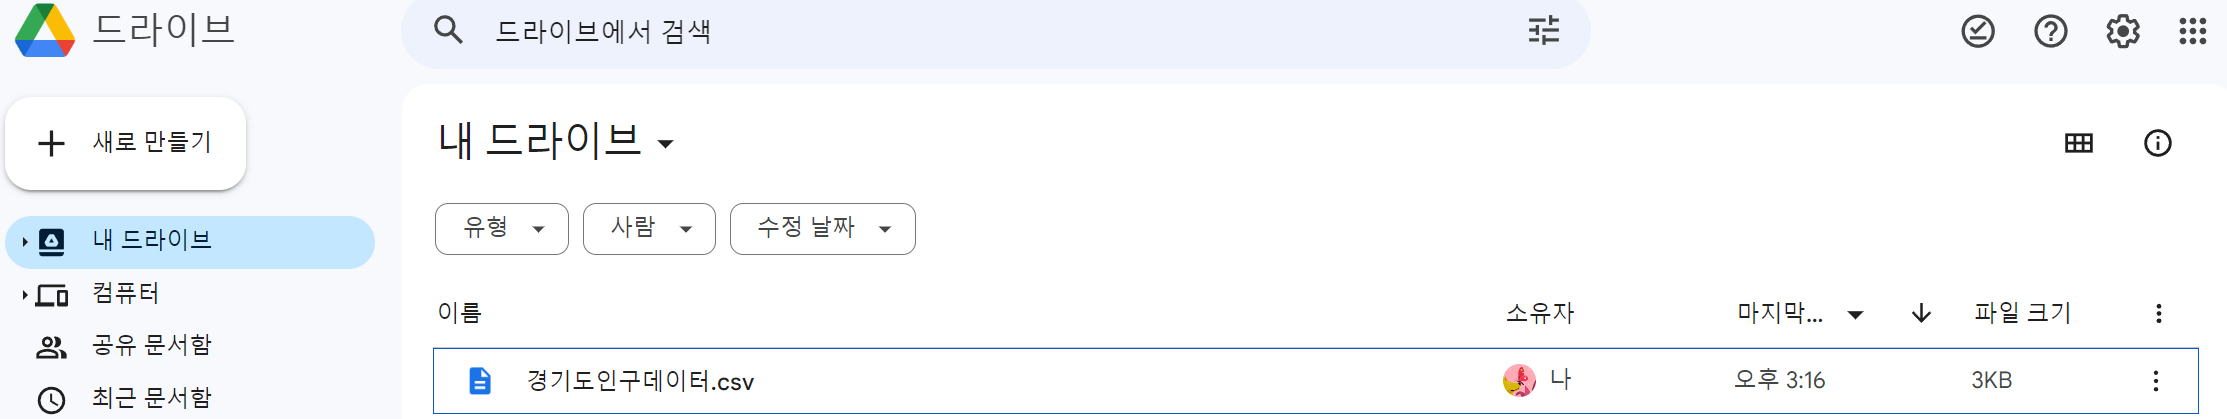



- 코랩과 구글 드라이브를 연결한 후, 구글 드라이브의 파일을 불러올 것입니다.
- 다음으로는 읽은 파일을 DataFrame으로 저장해보겠습니다.

In [ ]:
from google.colab import drive

drive.mount('/content/drive') # 구글 드라이브 연동

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

base_dir = '/content/drive/MyDrive/' # MyDrive는 구글 드라이브의 '내 드라이브'와 같음, 저장해둔 폴더에 따라 설정달리하기
file_path = base_dir + "경기도인구데이터.csv"

# csv 파일을 불러와 DataFrame에 저장하기,
raw_df = pd.read_csv(file_path, encoding='CP949') # csv 파일의 경우 한글이 포함된 파일을 불러오려면 encoding='CP949' 매개변수를 붙여줘야 인식한다.

#불러온 데이터의 구조를 확인해보자.
raw_df.head(7)

,구분,2007,2008,2009,2010,2011,2012,2013,2014
0,수원시장안구,287474,285803,290798,293692,290999,291757,300908,301196
1,수원시권선구,310553,308177,304097,306783,321176,332633,331773,339835
2,수원시팔달구,216945,213235,219833,216503,209772,206794,204805,203479
3,수원시영통구,252730,260210,258421,260557,266542,289074,310671,329718
4,성남시수정구,256744,248452,242161,241070,236123,233997,228167,223539
5,성남시중원구,263101,265137,259877,258093,254872,253883,256349,251982
6,성남시분당구,434115,428858,460688,481027,488328,490735,495018,499087


## 데이터 살펴보기

데이터프레임은 Column 이름으로 인덱싱을 하면 해당 Series를 가져올 수 있습니다.

이 때, column들은 문자열 형태로 인식되기 때문에 인덱싱 할 때도 문자열로 해야함을 유의하세요.

**알아두면 좋은 정보)**
- 데이터프레임의 `.columns`를 통해 각 열의 이름을 가져올 수 있다.

In [ ]:
raw_df.columns    # column들은 문자열 (정확히는, object) 타입이다.

Index(['구분', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014'], dtype='object')

In [ ]:
series_2010 = raw_df['2010']    # 2010 년도의 열만 추출

series_2010.head(10)

,2010
0,293692
1,306783
2,216503
3,260557
4,241070
5,258093
6,481027
7,431801
8,266261
9,355453


행 번호를 숫자가 아니라 원하는 걸로 바꾸고 싶다면 set_index 메소드를 사용할 수 있습니다.

**알아두면 좋은 정보)**
- 데이터프레임의 `.index`를 통해 각 행의 인덱스를 가져올 수 있다.

In [ ]:
raw_df.index    # 기존의 행 index는 0으로 시작하는 숫자였다.

RangeIndex(start=0, stop=44, step=1)

In [ ]:
# '구분'에 해당되는 열은 데이터로 포함이 안되도록 해당 열을 index로 만들어 줌.
df = raw_df.set_index('구분')

df.head(7)

,2007,2008,2009,2010,2011,2012,2013,2014
구분,,,,,,,,
수원시장안구,287474,285803,290798,293692,290999,291757,300908,301196
수원시권선구,310553,308177,304097,306783,321176,332633,331773,339835
수원시팔달구,216945,213235,219833,216503,209772,206794,204805,203479
수원시영통구,252730,260210,258421,260557,266542,289074,310671,329718
성남시수정구,256744,248452,242161,241070,236123,233997,228167,223539
성남시중원구,263101,265137,259877,258093,254872,253883,256349,251982
성남시분당구,434115,428858,460688,481027,488328,490735,495018,499087


In [ ]:
df.index    # set_index 후에는 '구분'이라는 열이 index로 대체되었다.

Index(['수원시장안구', '수원시권선구', '수원시팔달구', '수원시영통구', '성남시수정구', '성남시중원구', '성남시분당구',
       '의정부시', '안양시만안구', '안양시동안구', '부천시원미구', '부천시소사구', '부천시오정구', '광명시', '평택시',
       '동두천시', '안산시상록구', '안산시단원구', '고양시덕양구', '고양시일산동구', '고양시일산서구', '과천시',
       '구리시', '남양주시', '오산시', '시흥시', '군포시', '의왕시', '하남시', '용인시처인구', '용인시기흥구',
       '용인시수지구', '파주시', '이천시', '안성시', '김포시', '화성시', '광주시', '양주시', '포천시', '여주시',
       '연천군', '가평군', '양평군'],
      dtype='object', name='구분')

특정 위치의 행을 가져오려면 `.loc`에 행 이름으로 인덱싱을 하면 됩니다.

In [ ]:
df.loc['구리시']

,구리시
2007,196800
2008,195874
2009,195593
2010,196398
2011,194881
2012,192341
2013,189680
2014,186820


마찬가지로 loc을 통해 특정 행과 특정 열을 동시에 선택할 수도 있습니다.

In [ ]:
df.loc['구리시','2010']

196398

행과 열의 이름은 모르지만, 몇 번 째인지 번호만 알고 있다면 `.iloc`을 대신 사용할 수 있습니다.

In [ ]:
df.iloc[10,0]

443290

## 데이터 통계 함수
앞선 실습에서 파일을 불러와 Dataframe으로 불러왔다.<br/>
수업에서 배운 통계함수를 이용해 최댓값과 평균값을 출력해보자.

In [ ]:
max_value = df.max()
mean_value = df.min()

print('연도별 최대 인구수')
print(max_value)

print('\n연도별 평균 인구수')
print(mean_value)

연도별 최대 인구수
2007    492347
2008    505867
2009    525211
2010    564141
2011    578485
2012    599539
2013    618305
2014    636256
dtype: int64

연도별 평균 인구수
2007    45603
2008    45495
2009    45241
2010    45177
2011    44900
2012    45599
2013    45610
2014    45363
dtype: int64


기본적으로 통계 함수는 각 column에 대해서 수행됩니다.

만약 행을 기준으로 통계 함수를 수행하고 싶다면 axis 매개변수를 1로 설정하면 됩니다.

In [ ]:
max_value = df.max(axis=1)

print('지역별 최대 인구수')
print(max_value)

지역별 최대 인구수
구분
수원시장안구     301196
수원시권선구     339835
수원시팔달구     219833
수원시영통구     329718
성남시수정구     256744
성남시중원구     265137
성남시분당구     499087
의정부시       431801
안양시만안구     266261
안양시동안구     358316
부천시원미구     448602
부천시소사구     232190
부천시오정구     196045
광명시        355560
평택시        449555
동두천시        97595
안산시상록구     382571
안산시단원구     335755
고양시덕양구     424423
고양시일산동구    284207
고양시일산서구    297524
과천시         72279
구리시        196800
남양주시       636256
오산시        208565
시흥시        403797
군포시        288408
의왕시        159772
하남시        150479
용인시처인구     218400
용인시기흥구     402206
용인시수지구     340420
파주시        411348
이천시        205479
안성시        182173
김포시        340310
화성시        540862
광주시        298858
양주시        202072
포천시        160176
여주시        110386
연천군         45610
가평군         61213
양평군        105379
dtype: int64


## 데이터 시각화
수업시간에 배운 Matplotlib 도구를 이용하여 양주시의 연도별 인구 변화 그래프를 그려보겠습니다.<br/>

pyplot의 plt 함수는 시각화 할 데이터의 x값과 y값을 필요로 합니다.

또는 Series 넣으면 자동으로 인덱스가 x축이 되고, 각 값들이 y축이 됩니다.

2007    179914
2008    179914
2009    182106
2010    196706
2011    200360
2012    200310
2013    199143
2014    202072
Name: 양주시, dtype: int64
Index(['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014'], dtype='object')
[179914 179914 182106 196706 200360 200310 199143 202072]


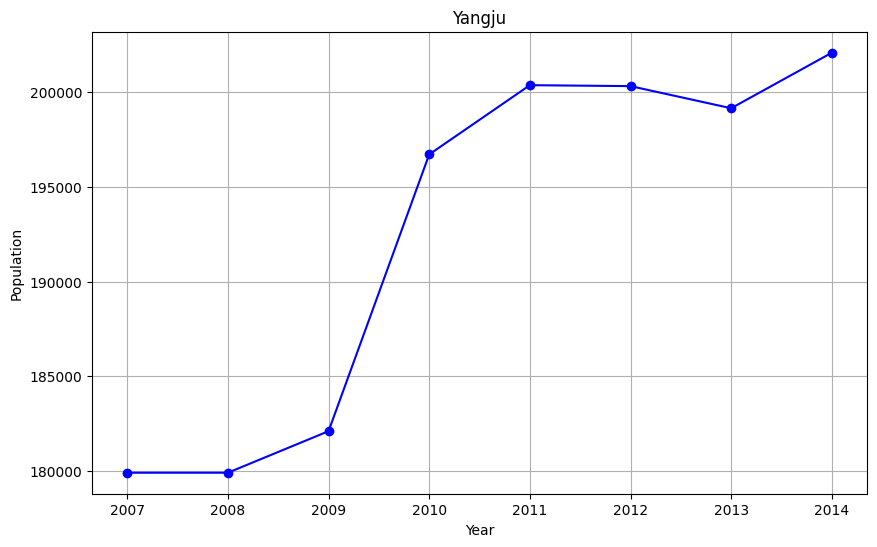

In [ ]:
import matplotlib.pyplot as plt

# 양주시에 해당하는 row를 가져오기 df.loc을 이용
yangju = df.loc['양주시']
print(yangju)
print(yangju.index)
print(yangju.values)

# plt 모듈로 그래프 작성하기
plt.figure(figsize=(10,6))

plt.plot(yangju.index , yangju.values, marker='o', linestyle='-', color='b')
#plt.plot(yangju, marker='o', linestyle='-', color='b')

plt.xlabel('Year')    # x축의 레이블 설정
plt.ylabel('Population')  # y축의 레이블 설정
plt.title('Yangju')   # figure의 제목 설정
plt.grid()

# 그래프를 출력하는 코드
plt.show()

figure 하나 위에서 여러 번의 plot을 사용하면, 한 그림에 여러 그래프가 그려지게 됩니다.

이 때, 각 plot에 label을 정해주고, plt.legend() 메소드를 사용하면 그래프의 범주가 나타나게 됩니다.

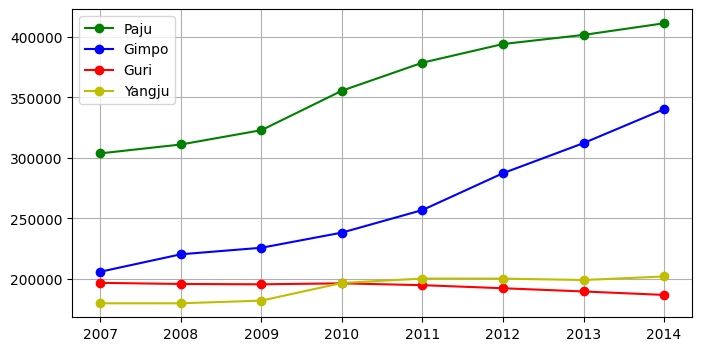

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 4))

plt.plot(df.loc['파주시'], 'go-', label='Paju')   # 'go-': 그래프의 색과 마커, 스타일을 하나로 축약함
plt.plot(df.loc['김포시'], 'bo-',label='Gimpo')
plt.plot(df.loc['구리시'], 'ro-',label='Guri')
plt.plot(df.loc['양주시'], 'yo-',label='Yangju')
plt.grid()

plt.legend()    # 범주를 표시

plt.show()

각 그래프를 분리하고 싶다면,

아래 코드처럼 하나의 figure위에 여러 sub_plot을 추가하고 각 sub_plot 위에 그래프를 그리면 됩니다.

이 때, 각 sub_plot에 xlabel이나 title을 설정하고 싶다면 다른 메소드를 사용해야 하는 것에 유의하세요.

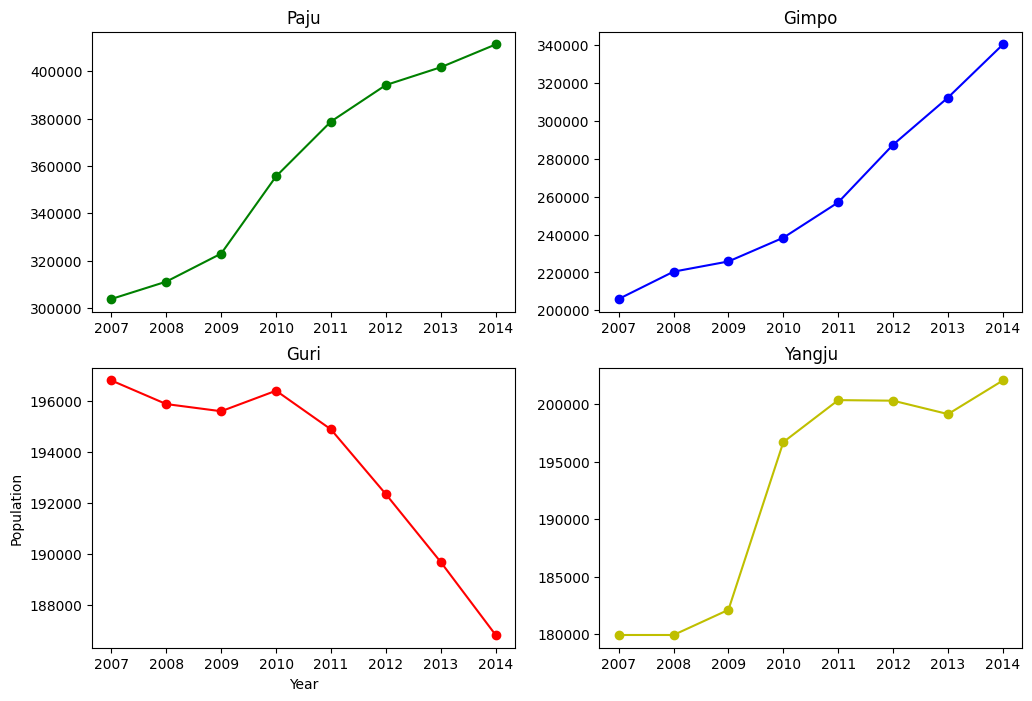

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(2, 2, 1) #subplot들을 추가해서 ax1, ax2로 이렇게 변수를 만들어주기 plot을 하면 각각각 그래프가 만들어진다
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.plot(df.loc['파주시'], 'go-')
ax1.set_title("Paju")       # subplot에 title이나 xlabel 할거면 plt. 이 아니라 set_title 이렇게 하면 됨

ax2.plot(df.loc['김포시'], 'bo-')
ax2.set_title("Gimpo")

ax3.plot(df.loc['구리시'], 'ro-')
ax3.set_xlabel("Year")
ax3.set_ylabel("Population")
ax3.set_title("Guri")

ax4.plot(df.loc['양주시'], 'yo-')
ax4.set_title("Yangju")

plt.show()

## 실습 종료 전 유의사항

※ 완료 시 우측 상단 프로필 옆 '**공유 - 액세스를 *링크가 있는 모든 사용자*로 전환**' 후 복사한 링크를 이루리 과제 란에 업로드 하세요.

<img src="https://drive.google.com/uc?id=1Zj1FKIz0sanqUfkfr3scp5M-dDgMFxYQ" height=300>

</br>

※ 추가로 상단 메뉴 '**파일 - 다운로드 - .ipynb**' 로 다운로드 후 첨부 파일로 업로드 하세요.

※ 즉, 과제의 텍스트란에는 링크를, 파일 첨부란에는 .ipynb 파일을 제출하십시오.